<a href="https://colab.research.google.com/github/spoycheva/A-B-test/blob/main/DataScienceChallenge_Stefani_Poycheva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Scientist

## Task

Accurately predicting future demand is key for success in hospitality industry, since a demand forecast helps with planning of inventory or staffing.

Your task is to predict future daily sales for all locations of one restaurant chain. The prediction should provide daily sales for 7 days ahead.

I.e., the output is: for each location predicted daily sales, for 7 days ahead are returned.

| location | Date of Prediction | Forecast day 1 | Forecast day 2 | Forecast day 3 | …   | Forecast day 7 |
|----------|--------------------|----------------|----------------|----------------|-----|----------------|
| 9809     | 2019-12-01         | 500            | 530            | 480            | ... | 830            |
| 9810     | 2019-12-01         | 1250           | 1300           | 600            | ... | 1670           |

_We suggest you do not spend more than 8 hours on the task._

## Output

### What do we expect to get?
- Predictive model (end-to-end; from input data to the output predictions; both training and scoring) in Python
- Modelling documentation

### What are we assessing?
- Performance of the models (and the choice of the performance metric)
- Modelling approach
- Machine Learning best practices
- Quality and readability of the code

## Data

Use data provided in the file `TestData.csv`. The data contain daily sales data for 163 locations over a span of 25 months – 1 December 2017 and 31 December 2019.

Demonstrate the model performance in December 2019.
- Sales data available until 30 November 2019 & prediction for 1 to 7 December 2019
- Sales data available until 1 December 2019 & prediction for 2 to 8 December 2019
- Etc.

All locations are from the same restaurant chain.

### Header
- location – id of the restaurant
- date - date
- sales – aggregated daily sales

**Tip:** In case you want to consider other factors influencing future sales, assume all locations are in London.



In [1]:
from google.colab import auth
auth.authenticate_user()

In [3]:
!gsutil cp gs://data-science-challenge-data/TestData.csv .

Copying gs://data-science-challenge-data/TestData.csv...
/ [1 files][  2.8 MiB/  2.8 MiB]                                                
Operation completed over 1 objects/2.8 MiB.                                      


In [4]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Import data set
df = pd.read_csv('TestData.csv')
df.head()

,location,date,sales
0,9708,2017-12-01,5371.933333
1,9708,2017-12-02,6789.400000
2,9708,2017-12-03,2437.080000
3,9708,2017-12-04,1395.700000
4,9708,2017-12-05,2020.300000


In [5]:
#Check data type
type(df)

pandas.core.frame.DataFrame

In [6]:
data = pd.read_csv('TestData.csv',index_col=[1],parse_dates=True,squeeze=True)
data

,location,sales
date,,
2017-12-01,9708,5371.933333
2017-12-02,9708,6789.400000
2017-12-03,9708,2437.080000
2017-12-04,9708,1395.700000
2017-12-05,9708,2020.300000
...,...,...
2019-12-27,15512,3573.933333
2019-12-28,15512,3800.466667
2019-12-29,15512,3053.733333


In [7]:
type(data)

pandas.core.frame.DataFrame

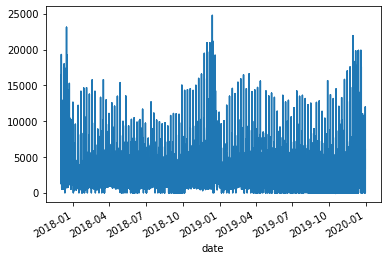

In [8]:
#All sales on locations
data['sales'].plot()

In [9]:
#Location filter with the most sales
df_max = data[data["location"] == 9789]
df_max

,location,sales
date,,
2017-12-01,9789,16462.600000
2017-12-02,9789,19300.646667
2017-12-03,9789,4939.280000
2017-12-04,9789,4903.460000
2017-12-05,9789,7227.500000
...,...,...
2019-12-27,9789,6826.193333
2019-12-28,9789,10774.146667
2019-12-29,9789,5805.760000


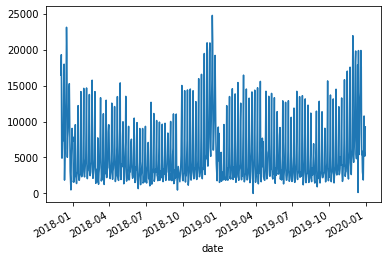

In [10]:
#Plotting the location with the most sales
df_max['sales'].plot()

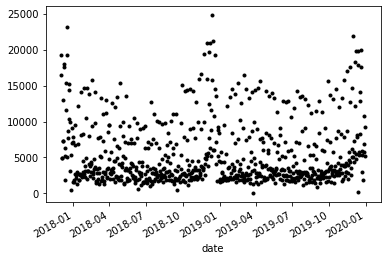

In [11]:
df_max['sales'].plot(style = 'k.')

In [12]:
#Size of date set
df_max.size

1504

In [13]:
#View describe statistics
df_max.describe()

,location,sales
count,752.0,752.000000
mean,9789.0,5480.303165
std,0.0,4484.345803
min,9789.0,0.000000
25%,9789.0,2361.561667
50%,9789.0,3462.346667
75%,9789.0,7377.820000
max,9789.0,24770.633333


In [14]:
#To see the moving average for 10 days
df_max_ma = df_max.rolling(window=10).mean()

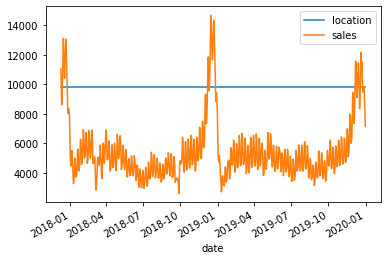

In [16]:
#Plotting of the moving average
df_max_ma.plot()
#Notice how sales increase at the end of each year (December)

In [17]:
#Sales forecast for the next day.
#As a forecast I will use the data from the previous day.
df_max_base = pd.concat([df_max,df_max['sales'].shift(1)], axis=1)

In [18]:
df_max_base

,location,sales,sales
date,,,
2017-12-01,9789,16462.600000,NaN
2017-12-02,9789,19300.646667,16462.600000
2017-12-03,9789,4939.280000,19300.646667
2017-12-04,9789,4903.460000,4939.280000
2017-12-05,9789,7227.500000,4903.460000
...,...,...,...
2019-12-27,9789,6826.193333,1866.113333
2019-12-28,9789,10774.146667,6826.193333
2019-12-29,9789,5805.760000,10774.146667


In [19]:
#Rename columns
df_max_base.columns = ['Location', 'Actual_Sales', 'Forcast_Sales']

In [20]:
df_max_base

,Location,Actual_Sales,Forcast_Sales
date,,,
2017-12-01,9789,16462.600000,NaN
2017-12-02,9789,19300.646667,16462.600000
2017-12-03,9789,4939.280000,19300.646667
2017-12-04,9789,4903.460000,4939.280000
2017-12-05,9789,7227.500000,4903.460000
...,...,...,...
2019-12-27,9789,6826.193333,1866.113333
2019-12-28,9789,10774.146667,6826.193333
2019-12-29,9789,5805.760000,10774.146667


In [21]:
#Remove row with NA
df_max_base.dropna(inplace=True)

In [22]:
df_max_base.head()

,Location,Actual_Sales,Forcast_Sales
date,,,
2017-12-02,9789,19300.646667,16462.600000
2017-12-03,9789,4939.280000,19300.646667
2017-12-04,9789,4903.460000,4939.280000
2017-12-05,9789,7227.500000,4903.460000
2017-12-06,9789,7277.400000,7227.500000


In [23]:
# Create a model to consider the root mean square error
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
df_max_error = mean_squared_error(df_max_base.Actual_Sales, df_max_base.Forcast_Sales)

In [25]:
df_max_error

24278362.112615258

In [26]:
np.sqrt(df_max_error)

4927.307795603524

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


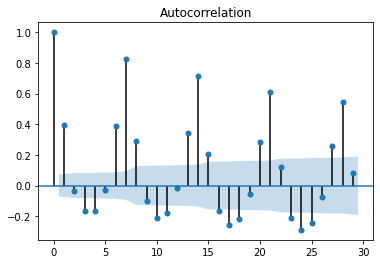

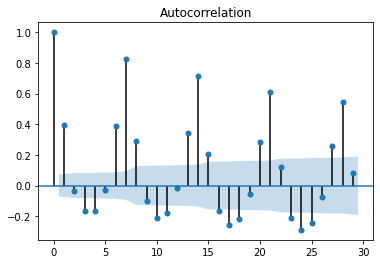

In [28]:
plot_acf(df_max['sales'])

In [29]:
# Q - 3  p - 1, 

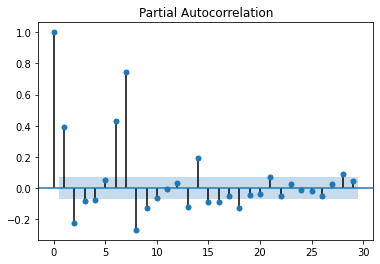

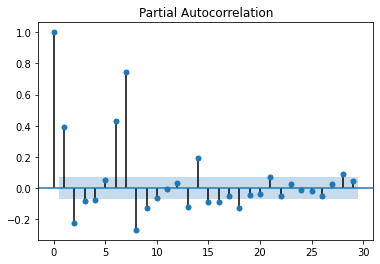

In [30]:
plot_pacf(df_max['sales'])

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [43]:
# df_max['date'] = pd.to_datetime(df_max['date'])
# df_max = df_max.set_index(df_max['date'])
# df_max = df_max.sort_index()

In [44]:
df_max_data = df[df["location"] == 9789]
df_max_data


,location,date,sales
29057,9789,2017-12-01,16462.600000
29058,9789,2017-12-02,19300.646667
29059,9789,2017-12-03,4939.280000
29060,9789,2017-12-04,4903.460000
29061,9789,2017-12-05,7227.500000
...,...,...,...
29804,9789,2019-12-27,6826.193333
29805,9789,2019-12-28,10774.146667
29806,9789,2019-12-29,5805.760000
29807,9789,2019-12-30,5192.146667


In [45]:
df_max_train = df_max_data[(df_max_data['date'] <= '2019-09-30')]
df_max_train

,location,date,sales
29057,9789,2017-12-01,16462.600000
29058,9789,2017-12-02,19300.646667
29059,9789,2017-12-03,4939.280000
29060,9789,2017-12-04,4903.460000
29061,9789,2017-12-05,7227.500000
...,...,...,...
29713,9789,2019-09-26,4180.633333
29714,9789,2019-09-27,7395.200000
29715,9789,2019-09-28,15655.033333
29716,9789,2019-09-29,3084.386667


In [46]:
df_max_train = df_max_train['sales']
df_max_train


29057    16462.600000
29058    19300.646667
29059     4939.280000
29060     4903.460000
29061     7227.500000
             ...     
29713     4180.633333
29714     7395.200000
29715    15655.033333
29716     3084.386667
29717     1768.366667
Name: sales, Length: 661, dtype: float64

In [47]:
df_max_test = df_max_data[(df_max_data['date'] >= '2019-10-01') & (df_max_data['date'] <= '2019-12-01')]

In [48]:
df_max_test = df_max_test['sales']
df_max_test

29718     3374.466667
29719     2256.233333
29720     3682.400000
29721     7168.933333
29722    13693.206667
             ...     
29775     5072.140000
29776     6241.500000
29777    14714.000000
29778    21943.046667
29779     5106.246667
Name: sales, Length: 62, dtype: float64

In [61]:
df_max_model = ARIMA(df_max_train, order=(2,1,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [62]:
df_max_model_fit = df_max_model.fit()

In [63]:
df_max_model_fit.aic

12607.26862755947

In [64]:
df_max_model_fit_forcast =  df_max_model_fit.forecast(steps=11)[0]

In [65]:
np.sqrt(mean_squared_error(df_max_test, df_max_model_fit_forcast))

ValueError: ignored